# GIULIO MARTINI'S PROJECT
## The Dataset
    The project I have chosen to complete regards the premature death of fetuses and, sometimes, the mother that is carrying the child. The dataset is provided in the form of a tabel, where each record is the report of a different patient (unborn child) and each column represents a different attribute, taken from various CGT (cardioctogram) exams. The central focus of each row is the last column: 'fetus_health', which describes whether the fetus is 'Normal', 'Suspicious' or 'In danger', by assigning the numbers 1, 2 and 3 to each class. 

## The goal
    The goal of this project is to choose the best performing classifier, out of the ones we have study, to predict which class a fetus will be in, given the CGT readings. The best classifier will be chosen in terms of accuracy and precision, not in terms of speed. This is not a question whether a classifier is fast enough, it is a question whether a physician must take action or not. The classifiers that will be studied are:
    
* K Nearest Neighbors
* Random Forest
* Linear Discriminant Analysis
* Decision Tree 

### Why these models?
Each of the models is a CLASSIFICATION model; classification models are supervised learning models which predict which class a specific element will be in, whereas regression models predict the numerical outcome of a specific dataset (in other words, classifiers predict classes, regressors predict numbers).

### KNN
KNN is one of the fundamental classifiers, it is based on the notion that a datapoint belongs to a specific class because its nearest neighbors also belong to said class. The nearest neighbors are those data points that have minimum distance in feature space from our new data point. And K is the number of such data points we consider in our implementation of the algorithm. Therefore, distance metric and K value are two important considerations while using the KNN algorithm. Euclidean distance is the most popular distance metric.

### Decision Tree
The Decision Tree classifier is a model where data is continuously split according to a certain parameter. The trees contain two 'entities': decision nodes and leaves. Decision nodes are where the data splits and the leaves are the final outcomes of such decisions. Internal leaves, in addition, represents the features of the dataset. 

### Random Forest
The Random Forest classifier (also called an 'ensemble' method) is carried out by creating a multitude of decision trees. The correct class will be the class selected by the most trees. Random forests correct the decision tree's overfitting problem and are generally more accurate. Random forests are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance.

### Linear Discriminant Analysis
The Linear Discriminant Analysis, also called LDA, is a classifier which is primarily used for its dimensionality reduction properties, which works best when the dataset is large and contains multiple classes (as this case). LDA makes predictions by estimating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class and a prediction is made.

## In addition
In addition to the main goal, the most influential attributes will be found, with respect to the outcome, and will be removed for further analysis to observe the impact of their absence. 

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


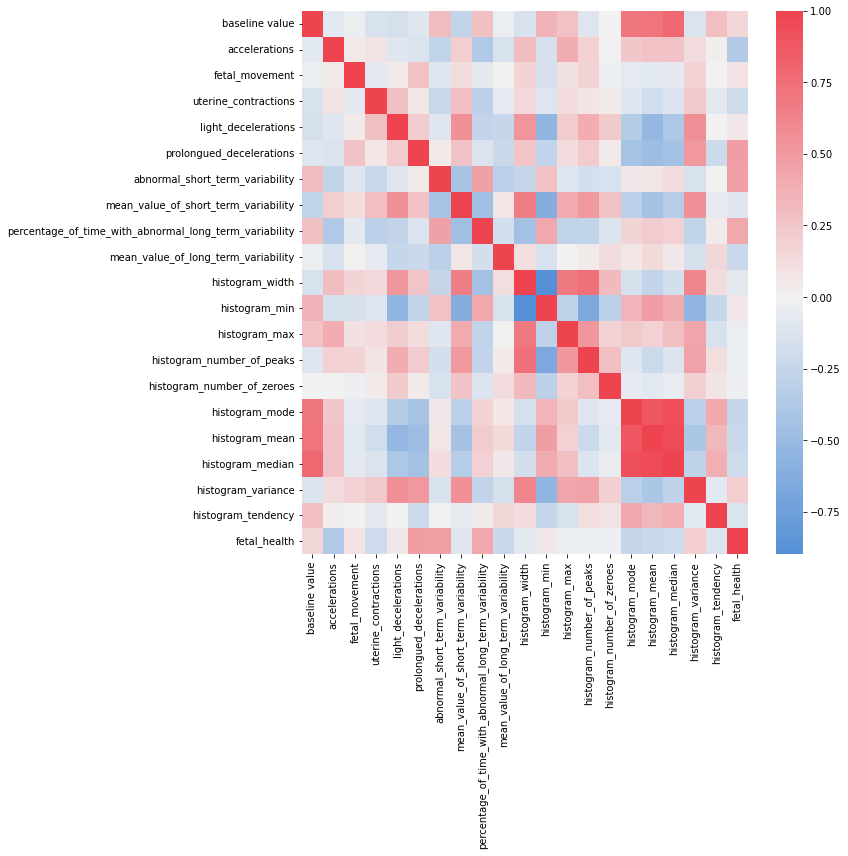

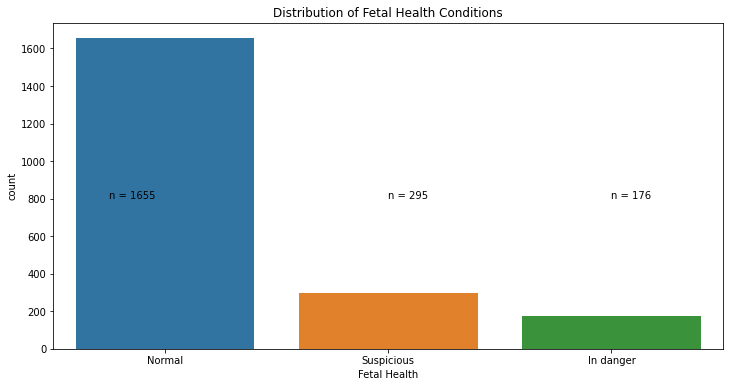

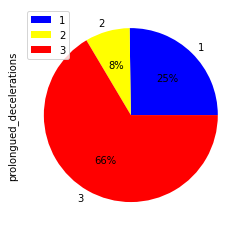

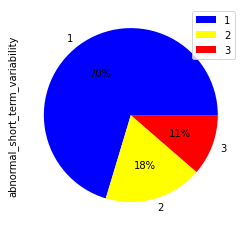

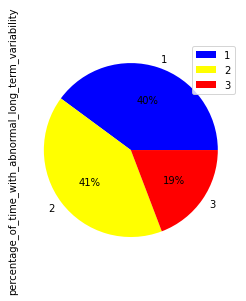

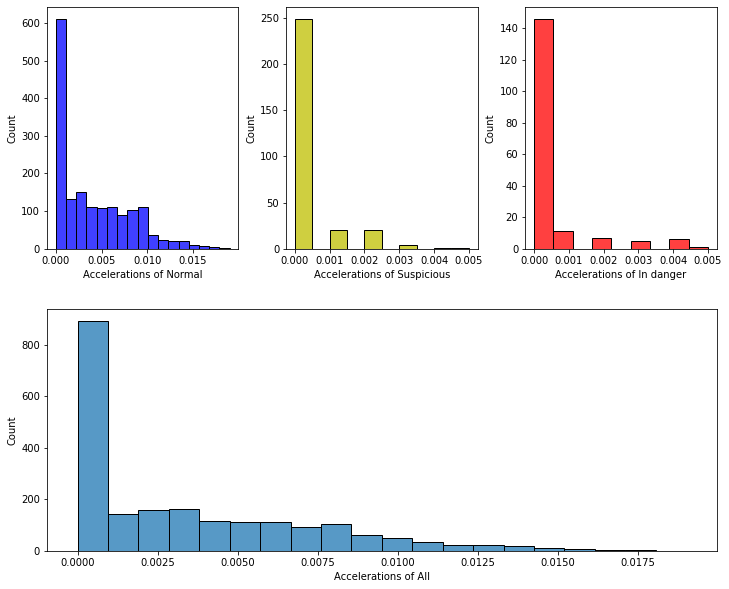

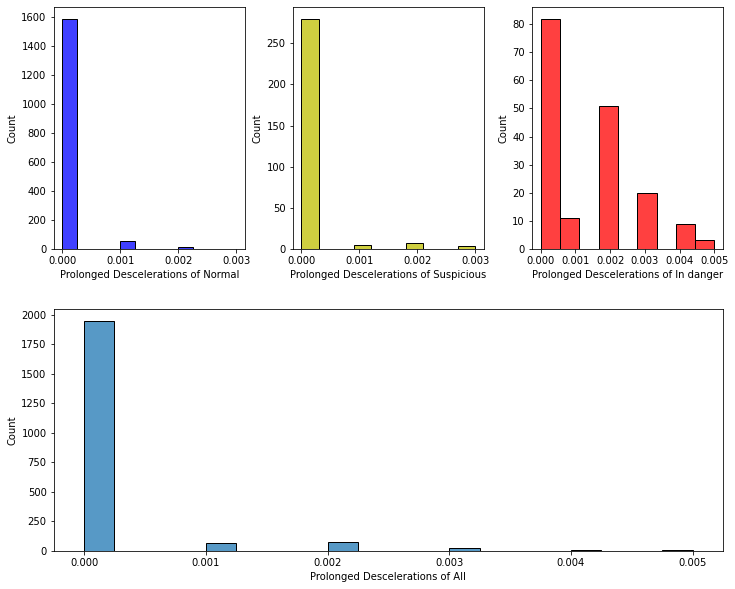

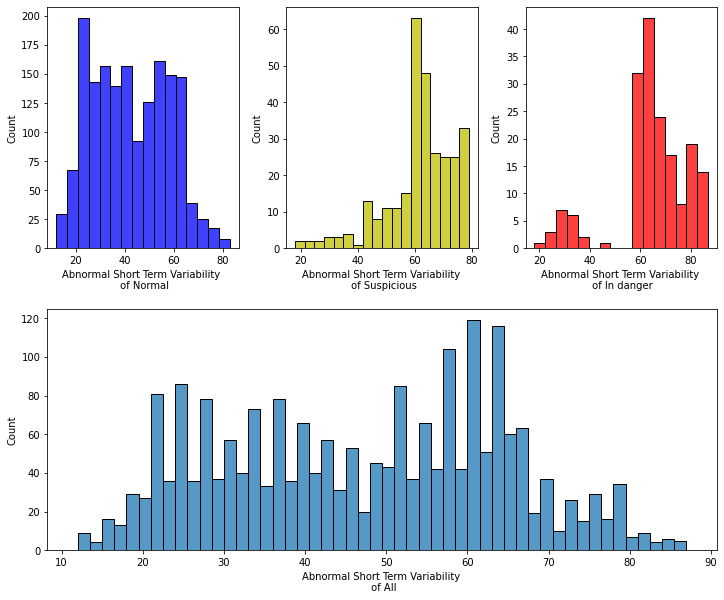

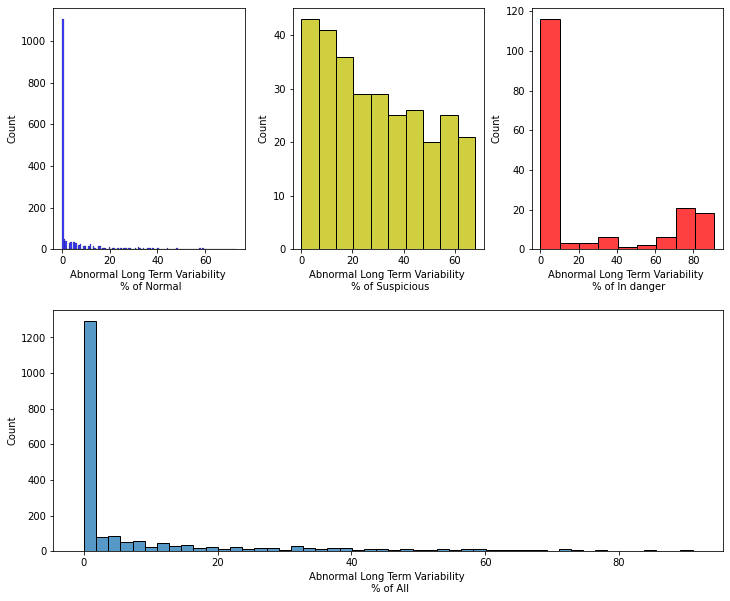

In [1]:
#Various imported libraries 
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report


#The database is brought from the excel file and fitted into a pandas dataframe
df = pd.read_excel(r'C:\Users\marti\OneDrive\Desktop\project1\fetal_health.xls')
#The 'severe_decelerations' column is removed from the dataframe, as it serves no purpose
df = df.drop(columns = 'severe_decelerations')
df.head()

#The X values are going to be everything except 'fetal_health' (what will be classified) and the Y will just be 'fetal_health'
dfX = df.drop(columns = 'fetal_health')
dfY = df['fetal_health']

#The correlation map plot and group of parameters are se.
correlationMap = sb.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
plt.figure(figsize=(10,10))
#Correlation matrix is built from the model and showed as a heatmap through the 'seaborn' library
correlationMatrix = df.corr()
sb.heatmap(correlationMatrix, cmap=correlationMap, center=0)
#The labels are for the histogram which counts the number of instances for each of the three classes
labels = ['Normal',
         'Suspicious',
         'In danger']
#The various subplots are for each subsequent histogram
fig, ax = plt.subplots(figsize=(12,6))
_ = sb.countplot(df.fetal_health)
_ = ax.set_xlabel('Fetal Health')
_ = ax.set_xticklabels(labels)
_ = plt.title('Distribution of Fetal Health Conditions')
_ = plt.text(s = f"n = {df.fetal_health.value_counts()[1]}", x = -0.25, y = 800)
_ = plt.text(s = f"n = {df.fetal_health.value_counts()[2]}", x = 1, y = 800)
_ = plt.text(s = f"n = {df.fetal_health.value_counts()[3]}", x = 2, y = 800)
_ = plt.colorbar = 'red'

def getall_visuals(data,column,xlabel, bins = 50):
    fig = plt.figure(figsize=(12, 10))

    plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

    subPlot1 = fig.add_subplot(2,3,1) # two rows, two columns, fist cell


    
    subPlot2 = fig.add_subplot(2,3,2) 

    subPlot3 = fig.add_subplot(2,3,3) 

    subPlot4 = fig.add_subplot(2,2,(3,4)) 
    #Histogram plots are set and plotted
    sb.histplot(data[data['fetal_health']==1][column] , ax=subPlot1, color = 'b')
    sb.histplot(data[data['fetal_health']==2][column] , ax=subPlot2, color = 'y')
    sb.histplot(data[data['fetal_health']==3][column] , ax=subPlot3, color = 'r')
    subPlot1.set_xlabel(xlabel + ' of Normal')
    subPlot2.set_xlabel(xlabel + ' of Suspicious')
    subPlot3.set_xlabel(xlabel + ' of In danger')
    subPlot4.set_xlabel(xlabel + ' of All')
    
    
    sb.histplot(data[column] , ax=subPlot4, bins=bins)
#Pie charts are plotted
df.groupby(['fetal_health']).sum().plot(kind='pie', y='prolongued_decelerations', autopct='%1.0f%%',
                                colors = ['blue', 'yellow', 'red'])

df.groupby(['fetal_health']).sum().plot(kind='pie', y='abnormal_short_term_variability', autopct='%1.0f%%',
                                colors = ['blue', 'yellow', 'red'])

df.groupby(['fetal_health']).sum().plot(kind='pie', y='percentage_of_time_with_abnormal_long_term_variability', autopct='%1.0f%%',
                                colors = ['blue', 'yellow', 'red'])


getall_visuals(df, 'accelerations', 'Accelerations', 20 )

getall_visuals(df, 'prolongued_decelerations', 'Prolonged Descelerations', 20 )

getall_visuals(df, 'abnormal_short_term_variability', 'Abnormal Short Term Variability \n', 50)

getall_visuals(df,'percentage_of_time_with_abnormal_long_term_variability', 'Abnormal Long Term Variability \n %', 50)


# The various graphs
After the correlation matrix, histogram graphs are provided to visualize the distribution of the three most prominent attributes in the three different categories. This is to show a relative distribution of what the model is trying to predict, so that the reader may better understand the consistency of the analyzed database. Along with histograms, pie charts are provided for further understanding.

In the total database, there are 1655 'Normal' fetuses, 295 'Suspicious' fetuses and the rest are 'In Danger'. From the readings, fortunatley, there seems to be far less 'In danger' cases.



K NEAREST NEIGHBOURS
              precision    recall  f1-score   support

           1       0.91      0.98      0.95       326
           2       0.77      0.60      0.68        68
           3       0.95      0.66      0.78        32

    accuracy                           0.90       426
   macro avg       0.88      0.75      0.80       426
weighted avg       0.89      0.90      0.89       426

The mean absolute error is 0.11502347417840375
Accuracy score:  0.8967136150234741
 --------- 

LINEAR DISCRIMINANT ANALYSIS
              precision    recall  f1-score   support

           1       0.92      0.97      0.94       326
           2       0.66      0.62      0.64        68
           3       0.84      0.50      0.63        32

    accuracy                           0.88       426
   macro avg       0.81      0.69      0.74       426
weighted avg       0.87      0.88      0.87       426

The mean absolute error is 0.13615023474178403
Accuracy score:  0.8755868544600939
 --------

<AxesSubplot:>

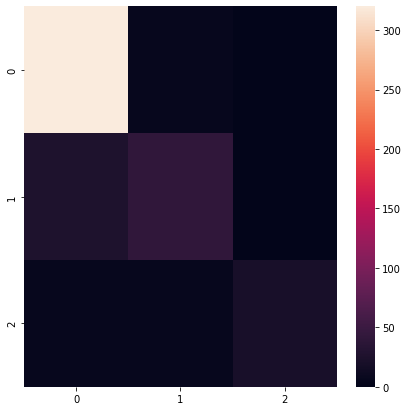

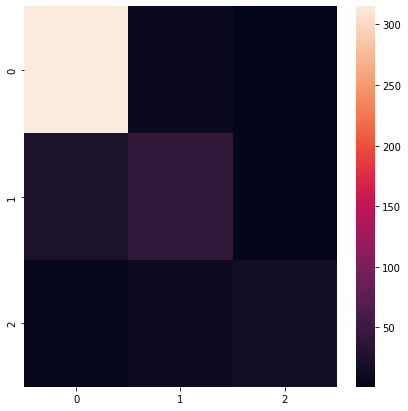

In [12]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report

df = pd.read_excel(r'C:\Users\marti\OneDrive\Desktop\project1\fetal_health.xls')
df = df.drop(columns = 'severe_decelerations')
df.head()

dfX = df.drop(columns = 'fetal_health')
dfY = df['fetal_health']

#Data is trained, tested and split, with a training size of 80% and a testing size of 20%
trainX, testX, trainY, testY = train_test_split(dfX, dfY, test_size = 0.20, random_state = 1)
#KNN model is run 
print('K NEAREST NEIGHBOURS')
model = KNN()
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
plt.figure(figsize=(7,7))
#KNN's confusion matrix is set and plotted
sb.heatmap(confusion_matrix(testY, predictedOutput))
print(' --------- \n')
#LDA model is run 
print('LINEAR DISCRIMINANT ANALYSIS')
model = LDA()
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
print(' --------- \n')
plt.figure(figsize=(7,7))
#LDA's confusion matrix is set and plotted
sb.heatmap(confusion_matrix(testY, predictedOutput))


I am here
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       326
           2       0.76      0.69      0.72        68
           3       0.86      0.94      0.90        32

    accuracy                           0.91       426
   macro avg       0.85      0.86      0.86       426
weighted avg       0.91      0.91      0.91       426

The mean absolute error is 0.09389671361502347
Accuracy score:  0.9107981220657277
RANDOM FOREST
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       326
           2       0.92      0.68      0.78        68
           3       0.88      0.88      0.88        32

    accuracy                           0.94       426
   macro avg       0.91      0.85      0.87       426
weighted avg       0.94      0.94      0.93       426

The mean absolute error is 0.06572769953051644
Accuracy score:  0.9366197183098591
------------------


<AxesSubplot:>

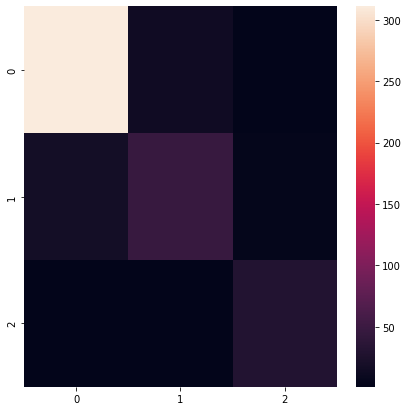

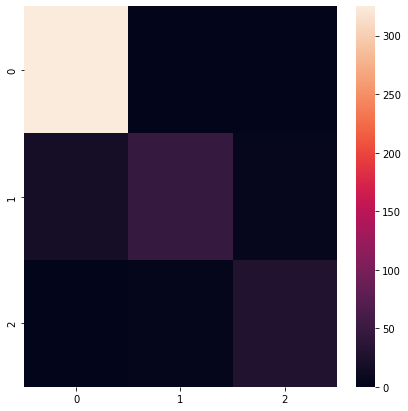

In [11]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report

df = pd.read_excel(r'C:\Users\marti\OneDrive\Desktop\project1\fetal_health.xls')
df = df.drop(columns = 'severe_decelerations')
df.head()

dfX = df.drop(columns = 'fetal_health')
dfY = df['fetal_health']

#Data is trained, tested and split, with a training size of 80% and a testing size of 20%
trainX, testX, trainY, testY = train_test_split(dfX, dfY, test_size = 0.20, random_state = 1)
print('DECISION TREE')
model = DecisionTreeClassifier()
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
plt.figure(figsize=(7,7))
#Decision Tree's confusion matrix is set and plotted 
sb.heatmap(confusion_matrix(testY, predictedOutput))
print('RANDOM FOREST')
#Random forest's model is run 
model = RandomForestClassifier()
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
print('------------------')
plt.figure(figsize=(7,7))
#Random Forest's confusion matrix is set and plotted 
sb.heatmap(confusion_matrix(testY, predictedOutput))


# Interpretation of Results
All of the models are run and are tested based on their accuracy and mean absolute error. The accuracy score of the Random Forest classifier seems breaches the 90% barrier, along with the Decision Tree classifier. LDA proves to be the worst model, followed swiftly by KNN. Random Forest outperforms every model; Random Forest is the most complex out of the models, and is the best one at handling overfitting and high variance. By using a correlation matrix, the three most influential values to the 'fetus_health' attribute are: 'prolongued_decelerations', 'abnormal_short_term_variability' and 'percentage_of_time_with_abnormal_long_term_variability'.

From the confusion matrix, it appears that most of the results have been placed in the correct location. The reason for the darker spots down the lower diagonal matrices is because there are far less datapoints of the 2 and 3 categories than the 'Normal'. To reiterate, there are 1655 cases of 'Normal', out of more than 2000.

By taking a look at the classification report, it can be noticed that the 'recall score' of each classifier is particularly low for class 1 ('Suspicious'). The recall score is a metric that quantifies the number of positive predictions made out of all positive predictions that could have taken place. In other words, the recall score is the ratio between true positives and false negatives plus the true positives, and should ideally be 1 (because that would mean that there are no false negatives); it is the percentage of a certain class correctly identified, and the 'Suspicious' class seems less identifiable than the others. 

The class 'Suspicious' is a middle way between the 'Normal' and 'In danger' ones. A suspicious fetus CAN be either normal or in danger, so it shares similar values of both other classes. For example, CGT readings show that relatively high values in the 'severe_decelerations' column lead to a fetus being in danger. Looking at the second set of histograms in the previous sections, it can be observed that for the 'Normal' class, its 'severe_decelerations' value is halfwway between 'Normal' and 'In danger'. This can be seen for almost every attribute. The real/concrete classes are 0 and 2; while class 1 is a speculative class, with values that belong to both class 0 and 2. 

This is a trend that can be observed in each section.

The three most influential attributes have been found, and they are: prolongued decelarations, abnormal short term availability and percentage of time with abnormal with long term variability
This is the accuracy report after eliminating these attributes
K NEAREST NEIGHBOURS
              precision    recall  f1-score   support

           1       0.86      0.96      0.91       326
           2       0.58      0.38      0.46        68
           3       0.89      0.53      0.67        32

    accuracy                           0.84       426
   macro avg       0.78      0.62      0.68       426
weighted avg       0.82      0.84      0.82       426

The mean absolute error is 0.18544600938967137
Accuracy score:  0.8356807511737089
 --------- 

LINEAR DISCRIMINANT ANALYSIS
              precision    recall  f1-score   support

           1       0.91      0.94      0.93       326
           2       0.63      0.66      0.65        68
           3       0.89      0.50      0.64        32



<AxesSubplot:>

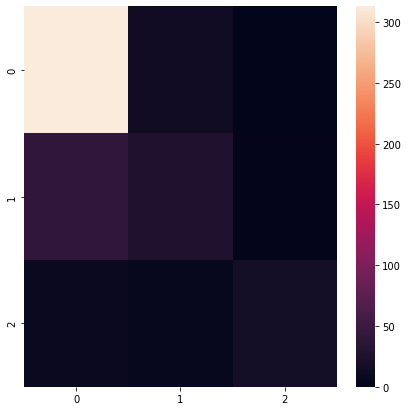

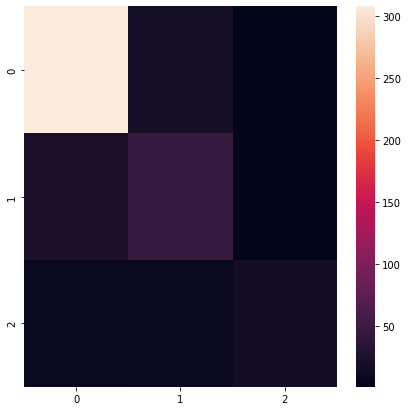

In [13]:
print('The three most influential attributes have been found, and they are: prolongued decelarations, abnormal short term availability and percentage of time with abnormal with long term variability')
print('This is the accuracy report after eliminating these attributes')
#The most influential attributes are removed to reveal how influential they are, percentage wise
df = pd.read_excel(r'C:\Users\marti\OneDrive\Desktop\project1\fetal_health.xls')
#The unwanted columns are dropped
df = df.drop(columns = 'severe_decelerations')
df = df.drop(columns = 'prolongued_decelerations')
df = df.drop(columns = 'abnormal_short_term_variability')
df = df.drop(columns = 'percentage_of_time_with_abnormal_long_term_variability')
df.head()
#The experiment is tested once more, as in the previous section
dfX = df.drop(columns = 'fetal_health')
dfY = df['fetal_health']


#Data is trained, tested and split, with a training size of 80% and a testing size of 20%
trainX, testX, trainY, testY = train_test_split(dfX, dfY, test_size = 0.20, random_state = 1)
#KNN model is run 
print('K NEAREST NEIGHBOURS')
model = KNN()
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
plt.figure(figsize=(7,7))
#KNN's confusion matrix is set and plotted
sb.heatmap(confusion_matrix(testY, predictedOutput))
print(' --------- \n')
#LDA model is run 
print('LINEAR DISCRIMINANT ANALYSIS')
model = LDA()
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
print(' --------- \n')
plt.figure(figsize=(7,7))
#LDA's confusion matrix is set and plotted
sb.heatmap(confusion_matrix(testY, predictedOutput))

DECISION TREE
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       326
           2       0.65      0.59      0.62        68
           3       0.67      0.75      0.71        32

    accuracy                           0.87       426
   macro avg       0.75      0.76      0.75       426
weighted avg       0.87      0.87      0.87       426

The mean absolute error is 0.13615023474178403
Accuracy score:  0.8732394366197183
RANDOM FOREST
              precision    recall  f1-score   support

           1       0.94      0.99      0.96       326
           2       0.78      0.63      0.70        68
           3       0.85      0.72      0.78        32

    accuracy                           0.91       426
   macro avg       0.86      0.78      0.81       426
weighted avg       0.91      0.91      0.91       426

The mean absolute error is 0.08685446009389672
Accuracy score:  0.9131455399061033
------------------


<AxesSubplot:>

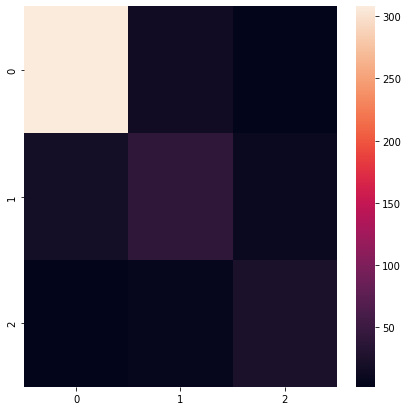

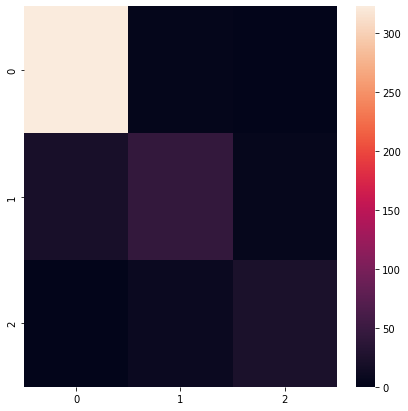

In [14]:
df = pd.read_excel(r'C:\Users\marti\OneDrive\Desktop\project1\fetal_health.xls')
#The unwanted columns are dropped
df = df.drop(columns = 'severe_decelerations')
df = df.drop(columns = 'prolongued_decelerations')
df = df.drop(columns = 'abnormal_short_term_variability')
df = df.drop(columns = 'percentage_of_time_with_abnormal_long_term_variability')
df.head()
#The experiment is tested once more, as in the previous section
dfX = df.drop(columns = 'fetal_health')
dfY = df['fetal_health']


#Data is trained, tested and split, with a training size of 80% and a testing size of 20%
trainX, testX, trainY, testY = train_test_split(dfX, dfY, test_size = 0.20, random_state = 1)

print('DECISION TREE')
model = DecisionTreeClassifier()
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
plt.figure(figsize=(7,7))
#Decision Tree's confusion matrix is set and plotted 
sb.heatmap(confusion_matrix(testY, predictedOutput))
print('RANDOM FOREST')
#Random forest's model is run 
model = RandomForestClassifier()
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
print('------------------')
plt.figure(figsize=(7,7))
#Random Forest's confusion matrix is set and plotted 
sb.heatmap(confusion_matrix(testY, predictedOutput))

# Interpretation of results
During this computation, the three most influential classes have been removed, in order to determine if they really are influential. The answer is Yes; both the accuracy score and the mean absolute error drop by an average of 5% which, when determining the health of an unborn child, is massive, and cannot be ignored. Random Forest alone drops from more than 94% to between 89% and 90%. The attributes MUST stay.

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       326
           2       0.75      0.71      0.73        68
           3       0.88      0.94      0.91        32

    accuracy                           0.91       426
   macro avg       0.86      0.86      0.86       426
weighted avg       0.91      0.91      0.91       426

The mean absolute error is 0.09389671361502347
Accuracy score:  0.9107981220657277
The tree has been pruned
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       326
           2       0.76      0.66      0.71        68
           3       0.94      0.91      0.92        32

    accuracy                           0.90       426
   macro avg       0.87      0.84      0.86       426
weighted avg       0.90      0.90      0.90       426

The mean absolute error is 0.1056338028169014
Accuracy score:  0.903755868544601


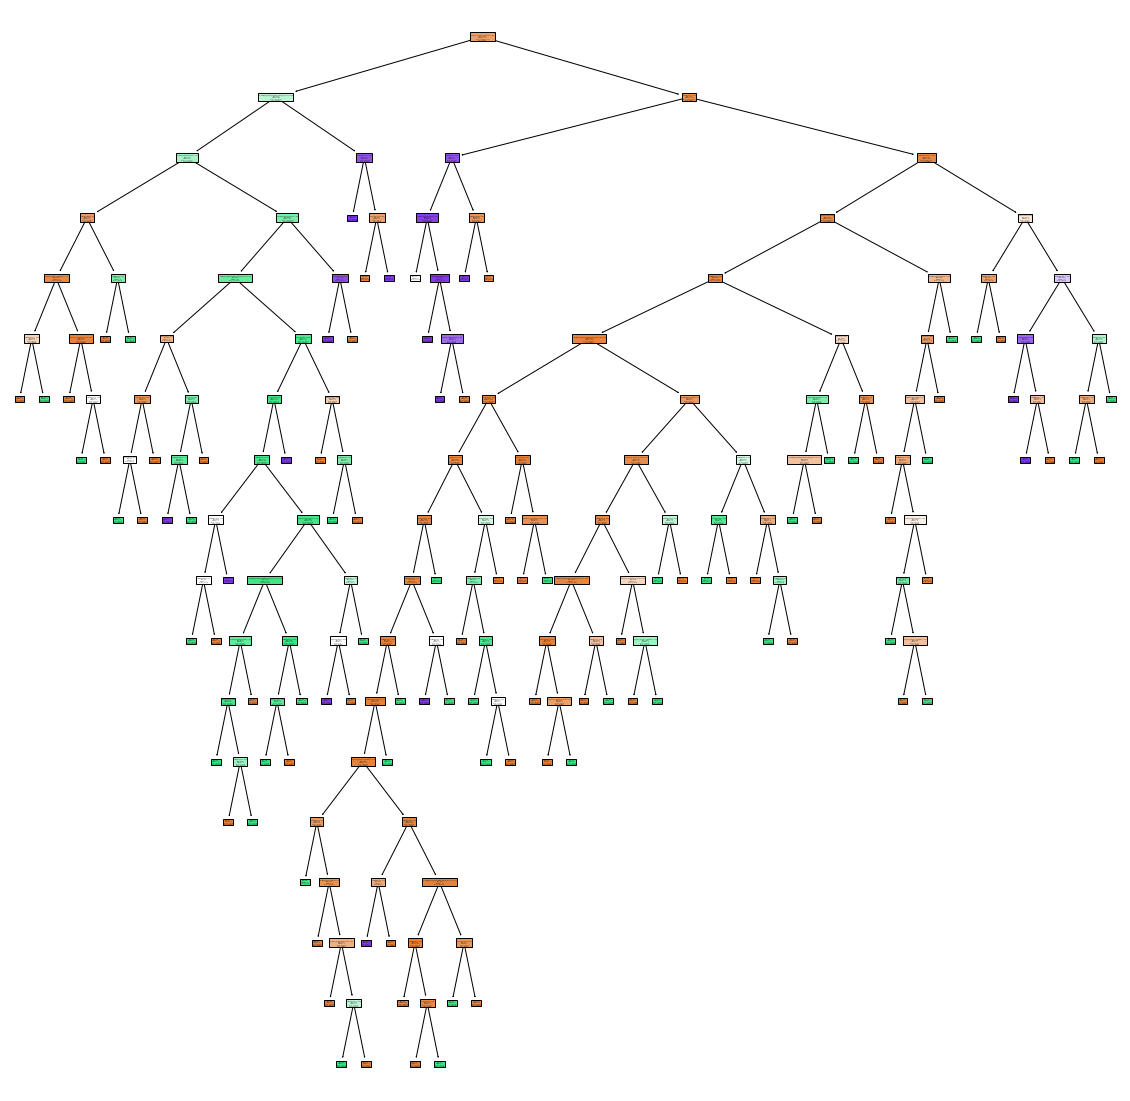

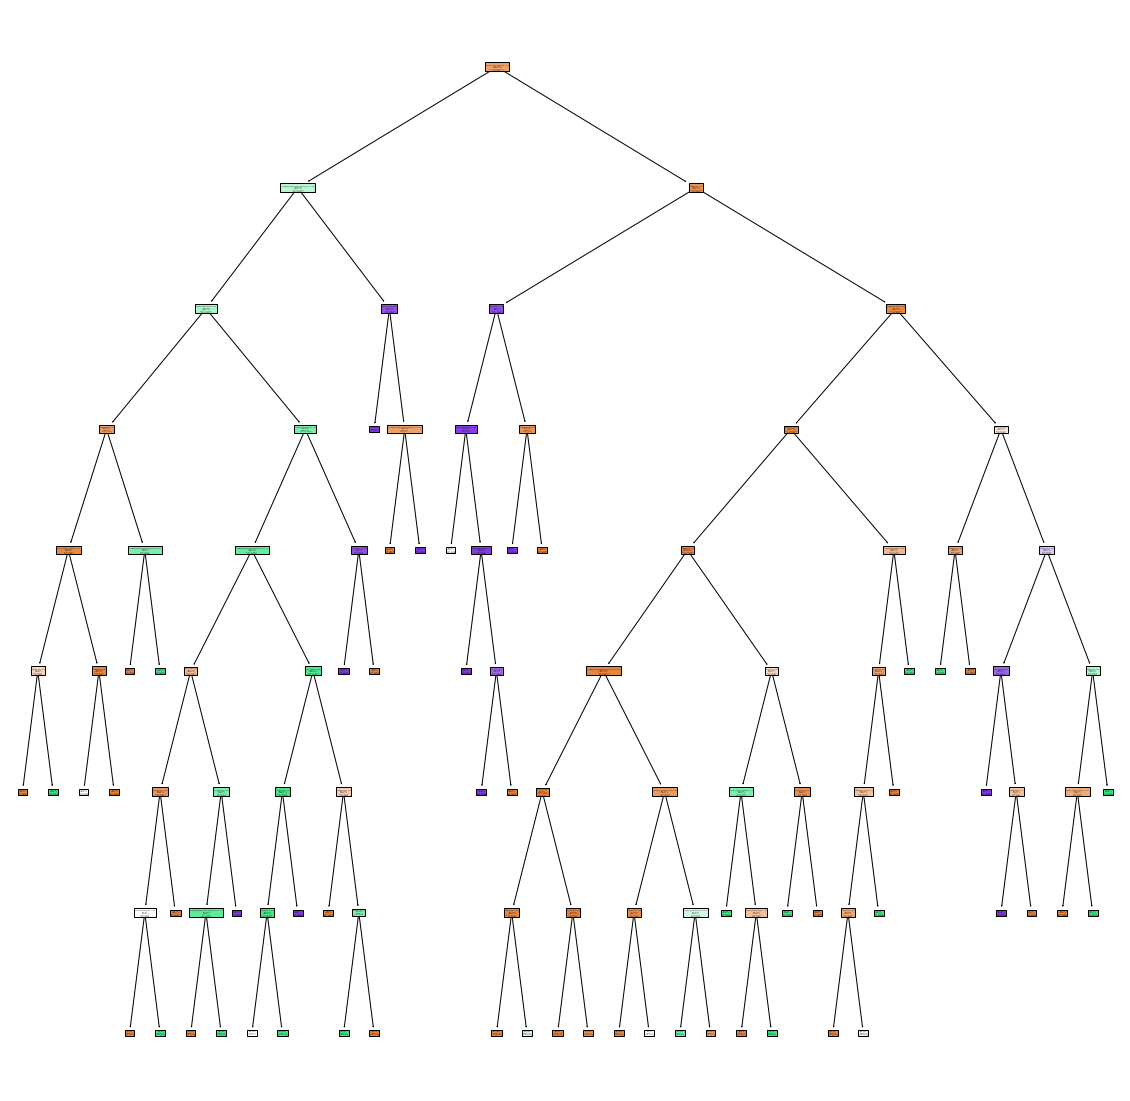

In [15]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report



#Once again, the dataframe is prepared by bringing into a pandas dataframe and dropping the 'severe_decelerations' column
df = pd.read_excel(r'C:\Users\marti\OneDrive\Desktop\project1\fetal_health.xls')
df = df.drop(columns = 'severe_decelerations')
df.head()

dfX = df.drop(columns = 'fetal_health')
dfY = df['fetal_health']
trainX, testX, trainY, testY = train_test_split(dfX, dfY, test_size = 0.20, random_state = 1)
#A special figure for two tree plots is prepared
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Normal','Suspicious', 'In danger']
model = DecisionTreeClassifier()
model.fit(trainX, trainY)
#BEFORE PRUNING 
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))

#Pre-pruned tree is prepared, with parameters that have been tested for maximum efficiency
print('The tree has been pruned')
#AFTER PRUNING
params = {'max_depth': [2,4,6,8,10],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}
gcv = GridSearchCV(estimator=model,param_grid=params)
gcv.fit(trainX,trainY)
model = gcv.best_estimator_
model.fit(trainX,trainY)
trainedY = model.predict(trainX)
testedY = model.predict(trainX)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
plt.figure(figsize=(20,20))
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()


# Interpretation of results
The following computation involves 'pruning' various decision trees. 'Pruning' is a technique which reduces the size of a tree by removing attributes that are seen as non essential. This can be seen in the visualization of following trees. The first image represents a normal tree, and a pruned tree is the second image. As obvious, the second tree has less branches and, by the accuracy and mean absolute error, it can be seen that there is a drop in both. The accuracy drops by about 1%. In the case of fetus lives, it would be best not to prune. 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
#The database is prepared for the last time
df = pd.read_excel(r'C:\Users\marti\OneDrive\Desktop\project1\fetal_health.xls')
df = df.drop(columns = 'severe_decelerations')
df.head()

dfX = df.drop(columns = 'fetal_health')
dfY = df['fetal_health']
trainX, testX, trainY, testY = train_test_split(dfX, dfY, test_size = 0.20, random_state = 1)

#Each of the three Boosters is tested with parameters that garantuee maximum efficiency.
#The treesare placed in order of maximum accuracy 
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
print(classification_report(testY, predictedOutput))
model = GradientBoostingClassifier()
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
model = XGBClassifier()
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))



C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


The mean absolute error is 0.14553990610328638
Accuracy score:  0.8755868544600939
              precision    recall  f1-score   support

           1       0.92      0.93      0.92       326
           2       0.67      0.69      0.68        68
           3       0.92      0.72      0.81        32

    accuracy                           0.88       426
   macro avg       0.84      0.78      0.80       426
weighted avg       0.88      0.88      0.88       426

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       326
           2       0.91      0.76      0.83        68
           3       0.91      0.97      0.94        32

    accuracy                           0.95       426
   macro avg       0.93      0.91      0.91       426
weighted avg       0.95      0.95      0.95       426

The mean absolute error is 0.0539906103286385
Accuracy score:  0.9483568075117371
[01:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_releas

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

           1       0.96      0.99      0.97       326
           2       0.91      0.75      0.82        68
           3       0.91      0.94      0.92        32

    accuracy                           0.95       426
   macro avg       0.93      0.89      0.91       426
weighted avg       0.95      0.95      0.95       426

The mean absolute error is 0.051643192488262914
Accuracy score:  0.9483568075117371


# Interpretation of results
The following computation involves the 'boosting' of decision trees. Boosting increases the accuracy and precision of decision trees. Boosting is done by creating various singular decision trees one after the other, and fitting the nth decision tree on the one that preceeds it. Thus, they are called ensemble methods, as they build upon eachother and all work together. This technique does improves accuracy, albeit with a small risk of less coverage. The boosting techniques covered in this compution are:
* ADA Boosting --> The ADA Boosting algorithm is the first designed boosting algorithm with a particular loss function. It is best used with weak learners. Each weak learner is developed as a decision stump (tree with a single split and two terminal nodes). It increases the predictive accuracy by assigning weights to both observations at end of every tree and weights to every classifier. For the final prediction, every classifier has different weightage. 
* Gradient Boosting --> As with the ADA Boost algorithm, the Gradient Boosting algorithm combines various weak learners to form a stronger one. The residual of the previous classifier becomes the input of the current (hence, it is called additive model). Residuals are captured in a step-by-step manner by the trees, in order to capture the maximum variance within the data.
* XGBOOST (Extreme Gradient Boosting) --> XGBoost is one of the peak performing boosting algorithms in the world of machine learning. It is an evolution of Gradient Boosting and uses advanced regularization (L1 and L2) to improve generalization capabilities. Its training can be parallelized in different structures and is better used when the training sample is longer than 1000 samples and when the number of features to predict is less than the number of training samples.

From the classification reports, it is clear that the Gradient and XG Boosting are the better algorithms, offering an accuracy score of above 94%, better than the Random Forest algorithm.

## BEST ALGORITHMS: 1. XGBOOST / Gradient Boosted Decision Tree
# 2. Random Forest 
# 3. Decision Tree 
# 4. KNN
# 5. ADA Boosted Decision Tree
# 6. LDA 
